# Titanic Data Analysis

## Importing packages and the data set

In [119]:
# Basic package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

In [120]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [121]:
# Copy the path to the data set
file = '/Users/josee/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv'
df = pd. read_csv(file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. How many variables and observations? Which are Numerical/Categorical?

In [122]:
df.shape

(891, 12)

There are 891 observations and 12 variables.

In [123]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Variable Notes**
- Categorical:
    - Survived: Survived (1) or died (0)
    - Pclass: Passenger’s class (1st, 2nd, or 3rd)
    - Name: Passenger’s name
    - Sex: Passenger’s sex
    - Ticket: Ticket number
    - Fare: Fare paid for ticket
    - Cabin: Cabin number
    - Embarked: Where the passenger got on the ship (C — Cherbourg, S — Southampton, Q = Queenstown)

- Numerical:
    - PassengerId: Unique ID of the passenger
    - Age: Passenger’s age
    - SibSp: Number of siblings/spouses aboard the Titanic
    - Parch: Number of parents/children aboard the Titanic

## 2. Do any of the columns have NaNs in them? What do NaNs mean?

In [124]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age' has 177 NaNs, 'Cabin' has 687 NaNs, and 'Embarked' has 2 NaNs. This means an observation is lacking data for a certain variable. It is somewhat concerning that 'Cabin' has so many NaNs. Since it has fewer observations, results regarding 'Cabin' should be approached with caution.

## 3. How many passengers survived?

In [125]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Out of the 891 passengers in this sample, 342 survived and 549 died.

## 4. Is survival correlated with Fare?

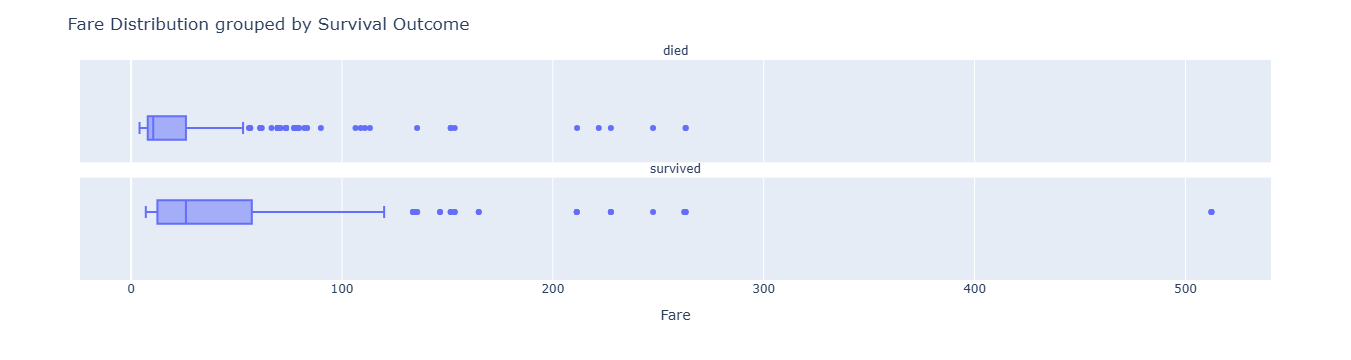

In [126]:
fig = px.box(df.replace({0:'died',1:'survived'}),
             x='Fare',
             facet_col='Survived',
             facet_col_wrap=1)
fig.update_layout(title='Fare Distribution grouped by Survival Outcome')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.show()

In this sample, it appears there is a potential correlation between survival and fare. The survivors had a median fare of 26, while those who died had a median fare of 10.5. This suggests the passengers that survived likely paid more for their ticket than those who died. It is interesting to note that the group of those who died had a third quartile of 26, the same as the median of the survivors. This further supports the correlation between survival and fare. It may be concerning that the survivor group has a larger interquartile range, which suggets a greater amount of variance in fare. However, I would argue that this is not a large concern, as the survivor group has a first quartile (12.475) that is greater than the median of those who died (10.5).

## 5. How many passengers were alone vs. traveling with family?

In [127]:
# create column 'Family' that is boolean of travling alone (0) or traveling with family (1)
df['Family'] = df['SibSp'] + df['Parch']
df['Family'][df['Family']>0] = 1
df

C:\Users\josee\AppData\Local\Temp\ipykernel_3144\608045208.py:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\josee\AppData\Local\Temp\ipykernel_3144\608045208.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy o

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [128]:
# find value counts of 'Family'
family = df['Family'].value_counts()
family

Family
0    537
1    354
Name: count, dtype: int64

Out of the 891 passengers in this sample, 537 were traveling alone and 354 were traveling with family.

## 6. Were people traveling alone more or less likely to survive?

In [129]:
# find value counts of observations grouped by family and survival
fam_surviv = df[['Family','Survived']].groupby('Family').value_counts()
fam_surviv

Family  Survived
0       0           374
        1           163
1       1           179
        0           175
Name: count, dtype: int64

In [130]:
# survival rate of traveling alone
print("survival rate of traveling alone: ", fam_surviv[0][1] / fam_surviv[0].sum())

# survival rate of traveling with family
print("survival rate of traveling with family: ", fam_surviv[1][1] / fam_surviv[1].sum())

survival rate of traveling alone:  0.30353817504655495
survival rate of traveling with family:  0.5056497175141242


The data suggests that people traveling alone were less likely to survive. The percentage of passengers traveling alone that survived is around 30.35% while the percentage of passengers traveling with family that survived is around 50.56%.

## 7. Do the basic statistics change if you group by class?

In [131]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.397306
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [132]:
df.groupby('Pclass').describe().T

Pclass                      1           2           3
PassengerId count  216.000000  184.000000  491.000000
            mean   461.597222  445.956522  439.154786
            std    246.737616  250.852161  264.441453
            min      2.000000   10.000000    1.000000
            25%    270.750000  234.500000  200.000000
            50%    472.000000  435.500000  432.000000
            75%    670.500000  668.000000  666.500000
            max    890.000000  887.000000  891.000000
Survived    count  216.000000  184.000000  491.000000
            mean     0.629630    0.472826    0.242363
            std      0.484026    0.500623    0.428949
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      1.000000    0.000000    0.000000
            75%      1.000000    1.000000    0.000000
            max      1.000000    1.000000    1.000000
Age         count  186.000000  173.000000  355.000000
            mean    38.233441   29.877630   25.140620
            std     14.802856   14.001077   12.495398
            min      0.920000    0.670000    0.420000
            25%     27.000000   23.000000   18.000000
            50%     37.000000   29.000000   24.000000
            75%     49.000000   36.000000   32.000000
            max     80.000000   70.000000   74.000000
SibSp       count  216.000000  184.000000  491.000000
            mean     0.416667    0.402174    0.615071
            std      0.611898    0.601633    1.374883
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    1.000000    1.000000
            max      3.000000    3.000000    8.000000
Parch       count  216.000000  184.000000  491.000000
            mean     0.356481    0.380435    0.393075
            std      0.693997    0.690963    0.888861
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      0.000000    1.000000    0.000000
            max      4.000000    3.000000    6.000000
Fare        count  216.000000  184.000000  491.000000
            mean    84.154687   20.662183   13.675550
            std     78.380373   13.417399   11.778142
            min      0.000000    0.000000    0.000000
            25%     30.923950   13.000000    7.750000
            50%     60.287500   14.250000    8.050000
            75%     93.500000   26.000000   15.500000
            max    512.329200   73.500000   69.550000
Family      count  216.000000  184.000000  491.000000
            mean     0.495370    0.434783    0.340122
            std      0.501140    0.497081    0.474233
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    1.000000    1.000000
            max      1.000000    1.000000    1.000000

When grouping the sample by class, we are able to see how different statistics varied among classes. While the sample as a whole had a mean survival of around 0.3838, the mean survival was much higher for 1st class (0.6296), somewhat higher for 2nd class (0.4728), and lower for 3rd class (0.2424). This suggests there may be a correlation between class and survival rate. Similarly, the median age of the sample is 28. But, 1st class has a much higher median (37), 2nd class around the same median (29), and 3rd class a lower median (24). This suggests 1st class tends to have older passengers compared to the other classes. The sample median of the fare (14.4542) further exemplifies this trend of 1st class being much higher (60.2875), 2nd class being around the sample median (14.2500), and 3rd class being below sample median (8.0500). It is important to note that the distribution among the classes is not even: 1st class has 216 observations, 2nd class has 184 observations, 3rd class has 491 observations. This means 3rd class, having the most number of observations, is most influential on the sample statistics.

## 8. Is survival correlated with passenger age?

In [133]:
fig = px.box(df.replace({0:'died',1:'survived'}),
             x='Age',
             facet_col='Survived',
             facet_col_wrap=1)
fig.update_layout(title='Age Distribution grouped by Survival Outcome')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.show()

In this sample, there does not seem to be a strong correlation between passenger age and their likelihood of surviving. Both survivors and those who died have a median of 28 years old. It could be argued that those who died are typically older, having an IQR of 21-39, and those who survived tend to be younger, having an IQR of 19-37.25. However, this difference seems too minor to be considered significant in determining a correlation.